c:\Python312\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 1.333332910588796e+36. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(
c:\Python312\Lib\site-packages\pydmd\snapshots.py:73: UserWarning: Input data condition number 2.590281099461123e+16. Consider preprocessing data, passing in augmented data
matrix, or regularization methods.
  warnings.warn(


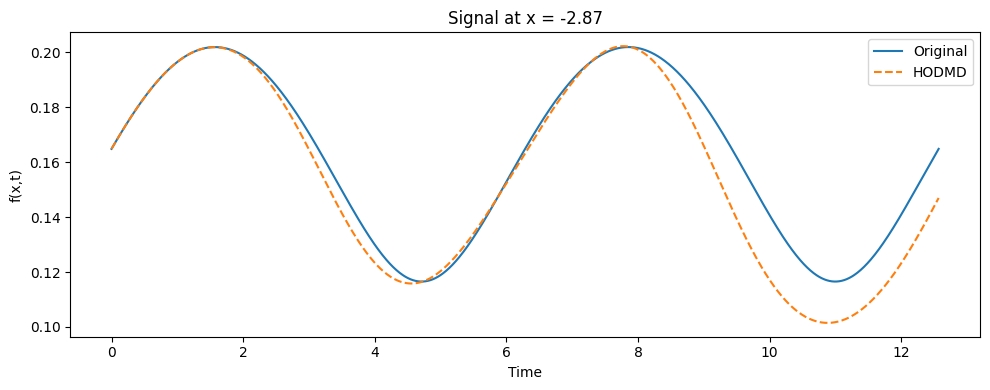

In [1]:
from pydmd import HODMD
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3, 3, 449)
t = np.linspace(0, 4 * np.pi, 1000)
X_grid, T_grid = np.meshgrid(x, t, indexing='ij')
f = np.exp(-X_grid**2 / 5) * np.cos(2 * X_grid) * np.sqrt(1 + 0.5 * np.sin(T_grid))

hodmd = HODMD(svd_rank=10, d=50, exact=True)
hodmd.fit(f)

X_dmd = hodmd.reconstructed_data.real  # Reconstructed signal

# Time signal at x[10] ---
plt.figure(figsize=(10, 4))
plt.plot(t, f[10, :], label='Original')
plt.plot(t[:X_dmd.shape[1]], X_dmd[10, :], '--', label='HODMD')
plt.title("Signal at x = {:.2f}".format(x[10]))
plt.xlabel("Time")
plt.ylabel("f(x,t)")
plt.legend()
plt.tight_layout()

# NORMAL - DMD D=1

In [2]:
# Upload the VORTAL DMD

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

# Define the main function
def main():
    # Load the data
    vortall_mat = io.loadmat('VORTALL.mat')
    X = vortall_mat['VORTALL']
    X = X[:, :100]

    # Number of time frames
    T = X.shape[1]

    # Size of the images
    m = 199
    n = 499

    # Plot two timeframes - 0 and 10
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))

    ax[0].contourf(np.real(np.reshape(X[:, 0], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[0].scatter(50, 100, 900, color='white', zorder=2)  # draw cylinder
    ax[0].set_aspect('equal')

    ax[1].contourf(np.real(np.reshape(X[:, 10], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[1].scatter(50, 100, 900, color='white', zorder=2)  # draw cylinder
    ax[1].set_aspect('equal')

    # Define the DMD function
    def DMD(X1, X2, r, dt):
        U, s, Vh = np.linalg.svd(X1, full_matrices=False)
        Ur = U[:, :r]
        Sr = np.diag(s[:r])
        Vr = Vh.conj().T[:, :r]

        Atilde = Ur.conj().T @ X2 @ Vr @ np.linalg.inv(Sr)
        Lambda, W = np.linalg.eig(Atilde)

        Phi = X2 @ Vr @ np.linalg.inv(Sr) @ W
        omega = np.log(Lambda) / dt

        alpha1 = np.linalg.lstsq(Phi, X1[:, 0], rcond=None)[0]
        b = np.linalg.lstsq(Phi, X2[:, 0], rcond=None)[0]

        time_dynamics = None
        for i in range(X1.shape[1]):
            v = np.array(alpha1)[:, 0] * np.exp(np.array(omega) * (i + 1) * dt)
            if time_dynamics is None:
                time_dynamics = v
            else:
                time_dynamics = np.vstack((time_dynamics, v))
        X_dmd = np.dot(np.array(Phi), time_dynamics.T)

        return Phi, omega, Lambda, alpha1, b, X_dmd, time_dynamics.T

    # Prepare data for DMD
    X1 = np.matrix(X[:, 0:-1])
    X2 = np.matrix(X[:, 1:])
    DMD_rank = 11
    dt = T * 0.001

    # Run DMD
    Phi, omega, Lambda, alpha1, b, X_dmd, time_dynamics = DMD(X1, X2, DMD_rank, dt)

    # Plot two timeframes - 0 and 10
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))

    # Plot DMD reconstructed
    ax[0].contourf(np.real(np.reshape(X_dmd[:, 0], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[0].scatter(50, 100, 900, color='white', zorder=2)  # draw cylinder
    ax[0].set_aspect('equal')

    ax[1].contourf(np.real(np.reshape(X_dmd[:, 20], (449, 199))).T, levels=1001, vmin=-2, vmax=2)
    ax[1].scatter(50, 100, 900, color='white', zorder=2)  # draw cylinder
    ax[1].set_aspect('equal')

# Use %time to measure the execution time of the main function
%time main()

FileNotFoundError: [Errno 2] No such file or directory: 'VORTALL.mat'